    # DIYANG RADITYA ANWAR
# Skripsi: Identifikasi Peluang Optimasi Biaya Layanan Cloud AWS Menggunakan Metode Random Forest

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Importing the dataset

In [210]:
data = pd.read_csv('../Datasets/940c2972-41a9-49e8-9d8b-097488d07395.csv', sep=";")
data.head(10)

C:\Users\diyan\AppData\Local\Temp\ipykernel_5936\1739089786.py:1: DtypeWarning: Columns (20,27,32,33,34,38,39,46,48,49,53,54,55,56,57,62,65,75,77,78,79,89,90,91,93,98,100,102,110,114,115,121,123,126,171,172,174,183,184,185) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../Datasets/940c2972-41a9-49e8-9d8b-097488d07395.csv', sep=";")


,identity_line_item_id,identity_time_interval,bill_invoice_id,bill_invoicing_entity,bill_billing_entity,bill_bill_type,bill_payer_account_id,bill_billing_period_start_date,bill_billing_period_end_date,line_item_usage_account_id,...,resource_tags_user_s_t_a_g_e,resource_tags_user_service,resource_tags_user_tahun,resource_tags_user_tech_owner,resource_tags_user_devops_guru_default,resource_tags_user_dlm_managed,resource_tags_user_sagemaker_domain_arn,resource_tags_user_sagemaker_user_profile_arn,year,month
0,bnqaix6yeyfpz4tgza7xmm2gayanp4ruptzyztp5vsme6j...,2025-02-01T00:00:00Z/2025-02-01T01:00:00Z,NaN,"Amazon Web Services, Inc.",AWS,Anniversary,"1,71404E+11",01/02/2025 00:00,01/03/2025 00:00,22159271696,...,NaN,Web,NaN,DIP,NaN,NaN,NaN,NaN,2025,2
1,hwfwhkgrffe7p5prmzfdj3oudbnyuwznkttab5c4c2mu3j...,2025-02-01T00:00:00Z/2025-02-01T01:00:00Z,NaN,"Amazon Web Services, Inc.",AWS,Anniversary,"1,71404E+11",01/02/2025 00:00,01/03/2025 00:00,22159271696,...,NaN,Storage,NaN,INFRA,NaN,NaN,NaN,NaN,2025,2
2,ys5mcs6222opc3reqfev3mo6u4eczvqzp4nyf23mdprtol...,2025-02-01T00:00:00Z/2025-02-01T01:00:00Z,NaN,"Amazon Web Services, Inc.",AWS,Anniversary,"1,71404E+11",01/02/2025 00:00,01/03/2025 00:00,22159271696,...,NaN,Engine,NaN,NaN,NaN,NaN,NaN,NaN,2025,2
3,7yihuc74424eupesxb7jymlrm4pbz4a7ecogfu5toocb5v...,2025-02-01T00:00:00Z/2025-02-01T01:00:00Z,NaN,"Amazon Web Services, Inc.",AWS,Anniversary,"1,71404E+11",01/02/2025 00:00,01/03/2025 00:00,22159271696,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025,2
4,k6kbm6kjzyumgfvu4rwfnricfpdo5mreasczm26odsjxpk...,2025-02-01T00:00:00Z/2025-02-01T01:00:00Z,NaN,"Amazon Web Services, Inc.",AWS,Anniversary,"1,71404E+11",01/02/2025 00:00,01/03/2025 00:00,22159271696,...,NaN,Storage,NaN,INFRA,NaN,NaN,NaN,NaN,2025,2
5,jmizzekt47bctphzzcl5ojfpfajygakcj26ncrpm3klgqk...,2025-02-01T00:00:00Z/2025-02-01T01:00:00Z,NaN,"Amazon Web Services, Inc.",AWS,Anniversary,"1,71404E+11",01/02/2025 00:00,01/03/2025 00:00,22159271696,...,NaN,LoadBalancer,2024.0,INFRA,NaN,NaN,NaN,NaN,2025,2
6,qlkjaxay7lwxvvwns6qby6lram4fwythe6j4c7dqdbohx6...,2025-02-01T00:00:00Z/2025-02-01T01:00:00Z,NaN,"Amazon Web Services, Inc.",AWS,Anniversary,"1,71404E+11",01/02/2025 00:00,01/03/2025 00:00,22159271696,...,NaN,Storage,NaN,INFRA,NaN,NaN,NaN,NaN,2025,2
7,5kxsa4tqcdmx7kvxydzx2ykbrter7qt3o36ez3dl7vfr7k...,2025-02-01T00:00:00Z/2025-02-01T01:00:00Z,NaN,"Amazon Web Services, Inc.",AWS,Anniversary,"1,71404E+11",01/02/2025 00:00,01/03/2025 00:00,22159271696,...,NaN,Storage,NaN,INFRA,NaN,NaN,NaN,NaN,2025,2
8,tmmw7aszioaqctjburhc3oekowir4oyw54xc6e42rtwzfb...,2025-02-01T00:00:00Z/2025-02-01T01:00:00Z,NaN,"Amazon Web Services, Inc.",AWS,Anniversary,"1,71404E+11",01/02/2025 00:00,01/03/2025 00:00,22159271696,...,NaN,Storage,NaN,INFRA,NaN,NaN,NaN,NaN,2025,2
9,ujh7krysszwprhllqv2nuo55irwhvuouoxe5fg6bswsjuu...,2025-02-01T00:00:00Z/2025-02-01T01:00:00Z,NaN,"Amazon Web Services, Inc.",AWS,Anniversary,"1,71404E+11",01/02/2025 00:00,01/03/2025 00:00,22159271696,...,NaN,VPN,2024.0,NaN,NaN,NaN,NaN,NaN,2025,2


In [211]:
data.tail(10)

,identity_line_item_id,identity_time_interval,bill_invoice_id,bill_invoicing_entity,bill_billing_entity,bill_bill_type,bill_payer_account_id,bill_billing_period_start_date,bill_billing_period_end_date,line_item_usage_account_id,...,resource_tags_user_s_t_a_g_e,resource_tags_user_service,resource_tags_user_tahun,resource_tags_user_tech_owner,resource_tags_user_devops_guru_default,resource_tags_user_dlm_managed,resource_tags_user_sagemaker_domain_arn,resource_tags_user_sagemaker_user_profile_arn,year,month
1048565,cq3o24qrp75s7h23dupcv2v6fjpclql6yukxait4pan4cw...,2025-02-28T22:00:00Z/2025-02-28T23:00:00Z,NaN,"Amazon Web Services, Inc.",AWS,Anniversary,"1,71404E+11",01/02/2025 00:00,01/03/2025 00:00,22159271696,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025,2
1048566,py4vmc7aogox465yq37obi2hmgyhesfpfmga6opgy5utvc...,2025-02-28T22:00:00Z/2025-02-28T23:00:00Z,NaN,"Amazon Web Services, Inc.",AWS,Anniversary,"1,71404E+11",01/02/2025 00:00,01/03/2025 00:00,22159271696,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025,2
1048567,i4qn356wxwjk3xbfogdqngodk62oh7vrcixdba6puy4nlr...,2025-02-28T23:00:00Z/2025-03-01T00:00:00Z,NaN,"Amazon Web Services, Inc.",AWS,Anniversary,"1,71404E+11",01/02/2025 00:00,01/03/2025 00:00,22159271696,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025,2
1048568,cq3o24qrp75s7h23dupcv2v6fjpclql6yukxait4pan4cw...,2025-02-28T23:00:00Z/2025-03-01T00:00:00Z,NaN,"Amazon Web Services, Inc.",AWS,Anniversary,"1,71404E+11",01/02/2025 00:00,01/03/2025 00:00,22159271696,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025,2
1048569,vozlj6a4zn6winxbghhpitop2tfewd74nwrfidjpq4jd7q...,2025-02-28T23:00:00Z/2025-03-01T00:00:00Z,NaN,"Amazon Web Services, Inc.",AWS,Anniversary,"1,71404E+11",01/02/2025 00:00,01/03/2025 00:00,22159271696,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025,2
1048570,povwivnipnjacyswllbvugnoj3ug4m7wgefqqthiuy4h7l...,2025-02-28T23:00:00Z/2025-03-01T00:00:00Z,NaN,"Amazon Web Services, Inc.",AWS,Anniversary,"1,71404E+11",01/02/2025 00:00,01/03/2025 00:00,22159271696,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025,2
1048571,yvuk7qgpyuim6pfl44hfpvm6gymcnoyymerxvgpa5ffghm...,2025-02-28T23:00:00Z/2025-03-01T00:00:00Z,NaN,"Amazon Web Services, Inc.",AWS,Anniversary,"1,71404E+11",01/02/2025 00:00,01/03/2025 00:00,22159271696,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025,2
1048572,py4vmc7aogox465yq37obi2hmgyhesfpfmga6opgy5utvc...,2025-02-28T23:00:00Z/2025-03-01T00:00:00Z,NaN,"Amazon Web Services, Inc.",AWS,Anniversary,"1,71404E+11",01/02/2025 00:00,01/03/2025 00:00,22159271696,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025,2
1048573,bychxlp42qa5ixzfay6n4a42z6mid37uvhlzhzd7x3qrfx...,2025-02-28T23:00:00Z/2025-03-01T00:00:00Z,NaN,"Amazon Web Services, Inc.",AWS,Anniversary,"1,71404E+11",01/02/2025 00:00,01/03/2025 00:00,22159271696,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025,2
1048574,yqksnmky5u6spqdzimb54z2lh5ff6p4sxutfvux3gsb5ti...,2025-02-28T23:00:00Z/2025-03-01T00:00:00Z,NaN,"Amazon Web Services, Inc.",AWS,Anniversary,"1,71404E+11",01/02/2025 00:00,01/03/2025 00:00,22159271696,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025,2


In [212]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Columns: 188 entries, identity_line_item_id to month
dtypes: float64(22), int64(19), object(147)
memory usage: 1.5+ GB


In [213]:
data.shape

(1048575, 188)

In [214]:
data.isna().sum()

identity_line_item_id                                  0
identity_time_interval                                 0
bill_invoice_id                                  1048575
bill_invoicing_entity                                  0
bill_billing_entity                                    0
                                                  ...   
resource_tags_user_dlm_managed                   1044973
resource_tags_user_sagemaker_domain_arn          1048284
resource_tags_user_sagemaker_user_profile_arn    1048284
year                                                   0
month                                                  0
Length: 188, dtype: int64

In [215]:
data["line_item_usage_amount"]

0            12574866
1          2232142857
2             5,44237
3            0,055935
4          1488095238
              ...    
1048570            10
1048571            10
1048572            10
1048573            10
1048574            10
Name: line_item_usage_amount, Length: 1048575, dtype: object

## Extracting meaningful and will be used features

line_item_usage_start_date
product_servicename
product_region
month

total_usage_amount = line_item_usage_start_date, bikin kolom baru usage_date, 
avg_daily_usage = 
usage_variance = 
usage_growth = 

service_name = product_servicename
region = product_region
total_usage_amount = 
avg_daily_usage = 
usage_variance = 
usage_growth = 
month = month

kolom-kolom di pakai ini karena minimal set yang secara langsung merepresentasikan perilaku penggunaan (usage behavior) layanan AWS dari sisi waktu, jenis layanan, lokasi, dan besaran konsumsi.

In [216]:
used_data = data[["line_item_usage_start_date", "product_servicename", "product_region", "line_item_usage_amount", "month", "year"]]
used_data

,line_item_usage_start_date,product_servicename,product_region,line_item_usage_amount,month,year
0,01/02/2025 00:00,AWS Data Transfer,ap-southeast-1,12574866,2,2025
1,01/02/2025 00:00,Amazon Elastic Compute Cloud,ap-southeast-1,2232142857,2,2025
2,01/02/2025 00:00,AWS Data Transfer,ap-southeast-1,"5,44237",2,2025
3,01/02/2025 00:00,AWS Data Transfer,ap-southeast-3,"0,055935",2,2025
4,01/02/2025 00:00,Amazon Elastic Compute Cloud,ap-southeast-1,1488095238,2,2025
...,...,...,...,...,...,...
1048570,28/02/2025 23:00,Savings Plans for AWS Compute usage,ap-southeast-1,10,2,2025
1048571,28/02/2025 23:00,Savings Plans for AWS Compute usage,ap-southeast-1,10,2,2025
1048572,28/02/2025 23:00,Savings Plans for AWS Compute usage,ap-southeast-1,10,2,2025
1048573,28/02/2025 23:00,Savings Plans for AWS Compute usage,ap-southeast-1,10,2,2025


In [217]:
print("=== INFORMASI DATA ===")
print("Dimensi data : ", used_data.shape)
print("Jumlah data yang kosong :\n", used_data.isna().sum())
print("Fitur-fitur data : ", used_data.columns)

=== INFORMASI DATA ===
Dimensi data :  (1048575, 6)
Jumlah data yang kosong :
 line_item_usage_start_date      0
product_servicename           278
product_region                278
line_item_usage_amount          0
month                           0
year                            0
dtype: int64
Fitur-fitur data :  Index(['line_item_usage_start_date', 'product_servicename', 'product_region',
       'line_item_usage_amount', 'month', 'year'],
      dtype='object')


In [218]:
used_data.isna().sum()

line_item_usage_start_date      0
product_servicename           278
product_region                278
line_item_usage_amount          0
month                           0
year                            0
dtype: int64

In [219]:
used_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column                      Non-Null Count    Dtype 
---  ------                      --------------    ----- 
 0   line_item_usage_start_date  1048575 non-null  object
 1   product_servicename         1048297 non-null  object
 2   product_region              1048297 non-null  object
 3   line_item_usage_amount      1048575 non-null  object
 4   month                       1048575 non-null  int64 
 5   year                        1048575 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


# Data Cleaning

### Dropping null values & Formatting features

mengubah koma format data `line_item_usage_amount` karena python membaca koma bukan dari `,` tapi dari `.`

In [220]:
used_data1 = used_data.copy()
used_data1["raw_usage_amount"] = used_data1["line_item_usage_amount"]

In [221]:
used_data

,line_item_usage_start_date,product_servicename,product_region,line_item_usage_amount,month,year
0,01/02/2025 00:00,AWS Data Transfer,ap-southeast-1,12574866,2,2025
1,01/02/2025 00:00,Amazon Elastic Compute Cloud,ap-southeast-1,2232142857,2,2025
2,01/02/2025 00:00,AWS Data Transfer,ap-southeast-1,"5,44237",2,2025
3,01/02/2025 00:00,AWS Data Transfer,ap-southeast-3,"0,055935",2,2025
4,01/02/2025 00:00,Amazon Elastic Compute Cloud,ap-southeast-1,1488095238,2,2025
...,...,...,...,...,...,...
1048570,28/02/2025 23:00,Savings Plans for AWS Compute usage,ap-southeast-1,10,2,2025
1048571,28/02/2025 23:00,Savings Plans for AWS Compute usage,ap-southeast-1,10,2,2025
1048572,28/02/2025 23:00,Savings Plans for AWS Compute usage,ap-southeast-1,10,2,2025
1048573,28/02/2025 23:00,Savings Plans for AWS Compute usage,ap-southeast-1,10,2,2025


memformatkan kolom `line_item_usage_amount` menjadi float

In [222]:
used_data1["line_item_usage_amount"] = used_data1["line_item_usage_amount"].astype(str).str.replace(",", ".", regex=True)
used_data1["line_item_usage_amount"] = pd.to_numeric(used_data1["line_item_usage_amount"], errors="coerce")
used_data1

,line_item_usage_start_date,product_servicename,product_region,line_item_usage_amount,month,year,raw_usage_amount
0,01/02/2025 00:00,AWS Data Transfer,ap-southeast-1,1.257487e+07,2,2025,12574866
1,01/02/2025 00:00,Amazon Elastic Compute Cloud,ap-southeast-1,2.232143e+09,2,2025,2232142857
2,01/02/2025 00:00,AWS Data Transfer,ap-southeast-1,5.442370e+00,2,2025,"5,44237"
3,01/02/2025 00:00,AWS Data Transfer,ap-southeast-3,5.593500e-02,2,2025,"0,055935"
4,01/02/2025 00:00,Amazon Elastic Compute Cloud,ap-southeast-1,1.488095e+09,2,2025,1488095238
...,...,...,...,...,...,...,...
1048570,28/02/2025 23:00,Savings Plans for AWS Compute usage,ap-southeast-1,1.000000e+01,2,2025,10
1048571,28/02/2025 23:00,Savings Plans for AWS Compute usage,ap-southeast-1,1.000000e+01,2,2025,10
1048572,28/02/2025 23:00,Savings Plans for AWS Compute usage,ap-southeast-1,1.000000e+01,2,2025,10
1048573,28/02/2025 23:00,Savings Plans for AWS Compute usage,ap-southeast-1,1.000000e+01,2,2025,10


In [223]:
used_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   line_item_usage_start_date  1048575 non-null  object 
 1   product_servicename         1048297 non-null  object 
 2   product_region              1048297 non-null  object 
 3   line_item_usage_amount      1048575 non-null  float64
 4   month                       1048575 non-null  int64  
 5   year                        1048575 non-null  int64  
 6   raw_usage_amount            1048575 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 56.0+ MB


sekarang mengubah format data `line_item_usage_start_date` menjadi `datetime`

In [224]:
used_data1["line_item_usage_start_date"] = pd.to_datetime(used_data1["line_item_usage_start_date"], format="%d/%m/%Y %H:%M", errors='coerce')
used_data1

,line_item_usage_start_date,product_servicename,product_region,line_item_usage_amount,month,year,raw_usage_amount
0,2025-02-01 00:00:00,AWS Data Transfer,ap-southeast-1,1.257487e+07,2,2025,12574866
1,2025-02-01 00:00:00,Amazon Elastic Compute Cloud,ap-southeast-1,2.232143e+09,2,2025,2232142857
2,2025-02-01 00:00:00,AWS Data Transfer,ap-southeast-1,5.442370e+00,2,2025,"5,44237"
3,2025-02-01 00:00:00,AWS Data Transfer,ap-southeast-3,5.593500e-02,2,2025,"0,055935"
4,2025-02-01 00:00:00,Amazon Elastic Compute Cloud,ap-southeast-1,1.488095e+09,2,2025,1488095238
...,...,...,...,...,...,...,...
1048570,2025-02-28 23:00:00,Savings Plans for AWS Compute usage,ap-southeast-1,1.000000e+01,2,2025,10
1048571,2025-02-28 23:00:00,Savings Plans for AWS Compute usage,ap-southeast-1,1.000000e+01,2,2025,10
1048572,2025-02-28 23:00:00,Savings Plans for AWS Compute usage,ap-southeast-1,1.000000e+01,2,2025,10
1048573,2025-02-28 23:00:00,Savings Plans for AWS Compute usage,ap-southeast-1,1.000000e+01,2,2025,10


In [225]:
used_data.loc[0, "line_item_usage_start_date"]

'01/02/2025 00:00'

In [226]:
used_data1["line_item_usage_start_date"].value_counts()

line_item_usage_start_date
2025-02-03 23:00:00    3467
2025-02-01 23:00:00    3387
2025-02-01 00:00:00    3387
2025-02-02 23:00:00    3383
2025-02-07 19:00:00    3314
                       ... 
2025-02-25 02:00:00       6
2025-02-28 07:00:00       6
2025-02-25 21:00:00       5
2025-02-24 08:00:00       5
2025-02-20 04:00:00       4
Name: count, Length: 672, dtype: int64

In [227]:
print(f"Null values : {used_data1.isna().sum().sum()}")

Null values : 556


In [228]:
used_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column                      Non-Null Count    Dtype         
---  ------                      --------------    -----         
 0   line_item_usage_start_date  1048575 non-null  datetime64[ns]
 1   product_servicename         1048297 non-null  object        
 2   product_region              1048297 non-null  object        
 3   line_item_usage_amount      1048575 non-null  float64       
 4   month                       1048575 non-null  int64         
 5   year                        1048575 non-null  int64         
 6   raw_usage_amount            1048575 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 56.0+ MB


memformatkan data menjadi format yang benar pada kolom

memformat kolom `product_servicename` dan `product_region` menjadi string

In [229]:
used_data1["product_servicename"] = used_data1["product_servicename"].convert_dtypes(convert_string=True)
used_data1["product_region"] = used_data1["product_region"].convert_dtypes(convert_string=True)


In [230]:
used_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column                      Non-Null Count    Dtype         
---  ------                      --------------    -----         
 0   line_item_usage_start_date  1048575 non-null  datetime64[ns]
 1   product_servicename         1048297 non-null  string        
 2   product_region              1048297 non-null  string        
 3   line_item_usage_amount      1048575 non-null  float64       
 4   month                       1048575 non-null  int64         
 5   year                        1048575 non-null  int64         
 6   raw_usage_amount            1048575 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1), string(2)
memory usage: 56.0+ MB


In [231]:
used_data1

,line_item_usage_start_date,product_servicename,product_region,line_item_usage_amount,month,year,raw_usage_amount
0,2025-02-01 00:00:00,AWS Data Transfer,ap-southeast-1,1.257487e+07,2,2025,12574866
1,2025-02-01 00:00:00,Amazon Elastic Compute Cloud,ap-southeast-1,2.232143e+09,2,2025,2232142857
2,2025-02-01 00:00:00,AWS Data Transfer,ap-southeast-1,5.442370e+00,2,2025,"5,44237"
3,2025-02-01 00:00:00,AWS Data Transfer,ap-southeast-3,5.593500e-02,2,2025,"0,055935"
4,2025-02-01 00:00:00,Amazon Elastic Compute Cloud,ap-southeast-1,1.488095e+09,2,2025,1488095238
...,...,...,...,...,...,...,...
1048570,2025-02-28 23:00:00,Savings Plans for AWS Compute usage,ap-southeast-1,1.000000e+01,2,2025,10
1048571,2025-02-28 23:00:00,Savings Plans for AWS Compute usage,ap-southeast-1,1.000000e+01,2,2025,10
1048572,2025-02-28 23:00:00,Savings Plans for AWS Compute usage,ap-southeast-1,1.000000e+01,2,2025,10
1048573,2025-02-28 23:00:00,Savings Plans for AWS Compute usage,ap-southeast-1,1.000000e+01,2,2025,10


In [232]:
used_data1['line_item_usage_start_date'].value_counts()

line_item_usage_start_date
2025-02-03 23:00:00    3467
2025-02-01 23:00:00    3387
2025-02-01 00:00:00    3387
2025-02-02 23:00:00    3383
2025-02-07 19:00:00    3314
                       ... 
2025-02-25 02:00:00       6
2025-02-28 07:00:00       6
2025-02-25 21:00:00       5
2025-02-24 08:00:00       5
2025-02-20 04:00:00       4
Name: count, Length: 672, dtype: int64

drop data null

In [233]:
used_data1 = used_data1.dropna(subset=["product_servicename", "product_region"], axis=0)
used_data1

,line_item_usage_start_date,product_servicename,product_region,line_item_usage_amount,month,year,raw_usage_amount
0,2025-02-01 00:00:00,AWS Data Transfer,ap-southeast-1,1.257487e+07,2,2025,12574866
1,2025-02-01 00:00:00,Amazon Elastic Compute Cloud,ap-southeast-1,2.232143e+09,2,2025,2232142857
2,2025-02-01 00:00:00,AWS Data Transfer,ap-southeast-1,5.442370e+00,2,2025,"5,44237"
3,2025-02-01 00:00:00,AWS Data Transfer,ap-southeast-3,5.593500e-02,2,2025,"0,055935"
4,2025-02-01 00:00:00,Amazon Elastic Compute Cloud,ap-southeast-1,1.488095e+09,2,2025,1488095238
...,...,...,...,...,...,...,...
1048570,2025-02-28 23:00:00,Savings Plans for AWS Compute usage,ap-southeast-1,1.000000e+01,2,2025,10
1048571,2025-02-28 23:00:00,Savings Plans for AWS Compute usage,ap-southeast-1,1.000000e+01,2,2025,10
1048572,2025-02-28 23:00:00,Savings Plans for AWS Compute usage,ap-southeast-1,1.000000e+01,2,2025,10
1048573,2025-02-28 23:00:00,Savings Plans for AWS Compute usage,ap-southeast-1,1.000000e+01,2,2025,10


In [234]:
used_data1 = used_data1.drop(columns=["raw_usage_amount"], axis=1)
used_data1

,line_item_usage_start_date,product_servicename,product_region,line_item_usage_amount,month,year
0,2025-02-01 00:00:00,AWS Data Transfer,ap-southeast-1,1.257487e+07,2,2025
1,2025-02-01 00:00:00,Amazon Elastic Compute Cloud,ap-southeast-1,2.232143e+09,2,2025
2,2025-02-01 00:00:00,AWS Data Transfer,ap-southeast-1,5.442370e+00,2,2025
3,2025-02-01 00:00:00,AWS Data Transfer,ap-southeast-3,5.593500e-02,2,2025
4,2025-02-01 00:00:00,Amazon Elastic Compute Cloud,ap-southeast-1,1.488095e+09,2,2025
...,...,...,...,...,...,...
1048570,2025-02-28 23:00:00,Savings Plans for AWS Compute usage,ap-southeast-1,1.000000e+01,2,2025
1048571,2025-02-28 23:00:00,Savings Plans for AWS Compute usage,ap-southeast-1,1.000000e+01,2,2025
1048572,2025-02-28 23:00:00,Savings Plans for AWS Compute usage,ap-southeast-1,1.000000e+01,2,2025
1048573,2025-02-28 23:00:00,Savings Plans for AWS Compute usage,ap-southeast-1,1.000000e+01,2,2025


## Normalisasi waktu

untuk bahan dasar agregasi harian

In [235]:
used_data1["usage_date"] = used_data1[
    "line_item_usage_start_date"
].dt.date
used_data1

,line_item_usage_start_date,product_servicename,product_region,line_item_usage_amount,month,year,usage_date
0,2025-02-01 00:00:00,AWS Data Transfer,ap-southeast-1,1.257487e+07,2,2025,2025-02-01
1,2025-02-01 00:00:00,Amazon Elastic Compute Cloud,ap-southeast-1,2.232143e+09,2,2025,2025-02-01
2,2025-02-01 00:00:00,AWS Data Transfer,ap-southeast-1,5.442370e+00,2,2025,2025-02-01
3,2025-02-01 00:00:00,AWS Data Transfer,ap-southeast-3,5.593500e-02,2,2025,2025-02-01
4,2025-02-01 00:00:00,Amazon Elastic Compute Cloud,ap-southeast-1,1.488095e+09,2,2025,2025-02-01
...,...,...,...,...,...,...,...
1048570,2025-02-28 23:00:00,Savings Plans for AWS Compute usage,ap-southeast-1,1.000000e+01,2,2025,2025-02-28
1048571,2025-02-28 23:00:00,Savings Plans for AWS Compute usage,ap-southeast-1,1.000000e+01,2,2025,2025-02-28
1048572,2025-02-28 23:00:00,Savings Plans for AWS Compute usage,ap-southeast-1,1.000000e+01,2,2025,2025-02-28
1048573,2025-02-28 23:00:00,Savings Plans for AWS Compute usage,ap-southeast-1,1.000000e+01,2,2025,2025-02-28


Data sudah bersih dan terformat dengan seharusnya, langkah selanjutnya adalah feature engineering

# Feature Engineering

In [236]:
# dasar untuk variance dan average
# agregasi penggunaan per hari per layanan
daily_usage = (
    used_data1
    .groupby([
        "product_servicename",
        "year",
        "month",
        "usage_date"
    ])["line_item_usage_amount"]
    .sum()
    .reset_index(name="daily_usage_amount")
)

In [237]:
monthly_features = (
    daily_usage
    .groupby(["product_servicename", "year", "month"])
    .agg(
        total_usage_amount=("daily_usage_amount", "sum"),
        avg_daily_usage=("daily_usage_amount", "mean"),
        usage_variance=("daily_usage_amount", "var"),
        max_daily_usage=("daily_usage_amount", "max"),
        min_daily_usage=("daily_usage_amount", "min")
    )
    .reset_index()
)

In [238]:
monthly_features["usage_growth"] = (
        (monthly_features["max_daily_usage"] -
         monthly_features["min_daily_usage"])
        / monthly_features["avg_daily_usage"]
)

# Optional: tangani pembagian nol
monthly_features["usage_growth"] = (
    monthly_features["usage_growth"]
    .replace([np.inf, -np.inf], 0)
    .fillna(0)
)

gabungkan semua fitur

In [239]:
features_final = monthly_features[[
    "product_servicename",
    "year",
    "month",
    "total_usage_amount",
    "avg_daily_usage",
    "usage_variance",
    "usage_growth"
]]

In [240]:
features_final

,product_servicename,year,month,total_usage_amount,avg_daily_usage,usage_variance,usage_growth
0,AWS Backup,2025,2,3.762720e-01,3.135600e-02,0.000000e+00,0.000000
1,AWS CloudFormation,2025,2,3.600000e+02,1.800000e+02,2.000000e+04,1.111111
2,AWS CloudTrail,2025,2,8.644110e+06,5.402569e+05,7.018463e+09,0.678807
3,AWS Cost Explorer,2025,2,3.280000e+03,3.644444e+02,6.807778e+04,1.454268
4,AWS Data Transfer,2025,2,1.228151e+14,7.675947e+12,4.139999e+24,1.141533
5,AWS Glue,2025,2,1.193495e+10,7.459341e+08,1.057663e+18,4.369023
6,AWS Key Management Service,2025,2,4.389999e+09,2.743750e+08,2.567866e+15,0.650836
7,AWS Lambda,2025,2,4.256380e+14,2.660237e+13,1.321073e+26,1.596267
8,AWS Secrets Manager,2025,2,1.100000e+02,1.000000e+01,0.000000e+00,0.000000
9,Amazon API Gateway,2025,2,8.960000e+04,5.600000e+03,1.168617e+07,2.476786


In [241]:
features_final.describe()

,year,month,total_usage_amount,avg_daily_usage,usage_variance,usage_growth
count,28.0,28.0,2.800000e+01,2.800000e+01,2.600000e+01,28.000000
mean,2025.0,2.0,2.030790e+15,1.269244e+14,5.454285e+29,1.228146
std,0.0,0.0,1.034904e+16,6.468150e+14,2.781066e+30,1.067073
min,2025.0,2.0,1.720000e-02,1.720000e-02,0.000000e+00,0.000000
25%,2025.0,2.0,8.159500e+04,4.714107e+03,1.969639e+09,0.609367
50%,2025.0,2.0,4.397381e+09,2.748363e+08,2.515612e+15,1.051854
75%,2025.0,2.0,1.974374e+12,1.233984e+11,3.294399e+21,1.616748
max,2025.0,2.0,5.482707e+16,3.426692e+15,1.418073e+31,4.369023


# Training

Membuat label antara inneficient dan costly

### Logika ilmiah:

Service dianggap inefficient jika:
- Fluktuasi tinggi → usage_variance
- Pertumbuhan cepat → usage_growth

### Threshold:
Pakai percentile (Q3) agar:
- Adaptif
- Tidak subjektif
- Tidak hard-coded

In [243]:
df1 = features_final.copy()

# log transformation untuk menormalkan distribusi fitur yang sangat skewed
df1["log_variance"] = np.log1p(df1["usage_variance"])
df1["log_growth"] = np.log1p(df1["usage_growth"])

# threshold ulang
var_thr = df1["log_variance"].quantile(0.75)
growth_thr = df1["log_growth"].quantile(0.75)

# label memakai OR dikarenakan kalau memakai AND terlalu ketat peraturannya sehingga yang memenuhi salah satu saja
df1["inefficient"] = (
        (df1["log_variance"] >= var_thr) |
        (df1["log_growth"] >= growth_thr)
).astype(int)

df1[[
    "product_servicename",
    "usage_variance",
    "usage_growth",
    "inefficient"
]]

,product_servicename,usage_variance,usage_growth,inefficient
0,AWS Backup,0.000000e+00,0.000000,0
1,AWS CloudFormation,2.000000e+04,1.111111,0
2,AWS CloudTrail,7.018463e+09,0.678807,0
3,AWS Cost Explorer,6.807778e+04,1.454268,0
4,AWS Data Transfer,4.139999e+24,1.141533,1
5,AWS Glue,1.057663e+18,4.369023,1
6,AWS Key Management Service,2.567866e+15,0.650836,0
7,AWS Lambda,1.321073e+26,1.596267,1
8,AWS Secrets Manager,0.000000e+00,0.000000,0
9,Amazon API Gateway,1.168617e+07,2.476786,1


### training

In [246]:
feature_cols = [
    "total_usage_amount",
    "avg_daily_usage",
    "usage_variance",
    "usage_growth"
]

X = df1[feature_cols]
y = df1["inefficient"]


In [247]:
# Stratifikasi menjaga proporsi kelas
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# Karena fitur skewed & berbeda skala pakai log transform
X_train_log = np.log1p(X_train)
X_test_log  = np.log1p(X_test)

In [248]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=6,
    random_state=42,
    class_weight="balanced"
)

rf_model.fit(X_train_log, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, n_estimators=200,
                       random_state=42)

In [249]:
y_pred = rf_model.predict(X_test_log)

## Evaluation

In [251]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.80      1.00      0.89         4

    accuracy                           0.89         9
   macro avg       0.90      0.90      0.89         9
weighted avg       0.91      0.89      0.89         9



In [253]:
confusion_matrix(y_test, y_pred)

array([[4, 1],
       [0, 4]])

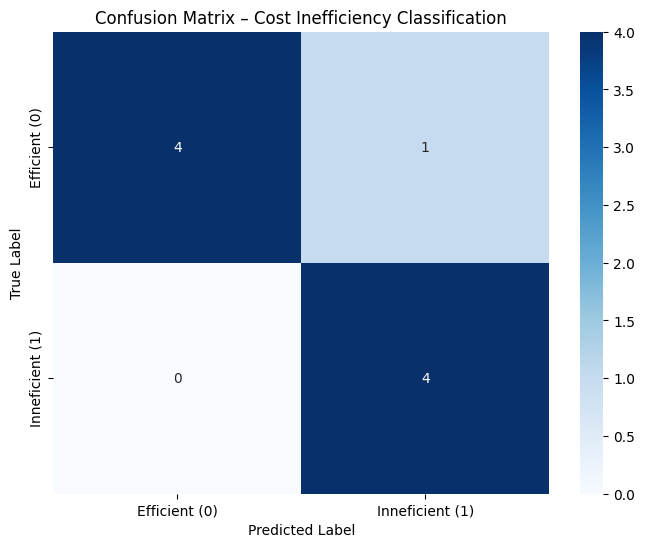

In [258]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
class_names = ['Efficient (0)', 'Inneficient (1)'] 

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix – Cost Inefficiency Classification')
plt.show()

## Menggunakan feature importance

In [259]:
feature_importance = pd.DataFrame({
    "feature": feature_cols,
    "importance": rf_model.feature_importances_
}).sort_values("importance", ascending=False)

feature_importance

,feature,importance
3,usage_growth,0.534852
2,usage_variance,0.187619
1,avg_daily_usage,0.150234
0,total_usage_amount,0.127295


## Temuan utama

Pertumbuhan penggunaan (`usage_growth`) adalah indikator paling dominan dari inefisiensi biaya cloud, bukan total penggunaan.

Penelitian ini membuktikan bahwa pendekatan berbasis machine learning mampu mengidentifikasi potensi inefisiensi biaya cloud secara efektif. Hasil analisis menunjukkan bahwa pertumbuhan penggunaan merupakan faktor paling signifikan dibandingkan total penggunaan. Model yang diusulkan dapat digunakan sebagai sistem pendukung keputusan untuk optimasi biaya cloud secara proaktif.